In [186]:
import os 
if 'notebooks' in os.getcwd():
    os.chdir("..")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from typing import Dict, List, Tuple

In [167]:
data = pd.read_csv(
    "data/round5/trades_round_4_day_3_wn.csv",
    sep = ';'
).set_index("timestamp")

In [168]:
prices = pd.read_csv(
    "data/round4/prices_round_4_day_3.csv",
    sep = ';'
).set_index("timestamp")

In [169]:
data

,buyer,seller,symbol,currency,price,quantity
timestamp,,,,,,
0,Caesar,Paris,DIP,SEASHELLS,7020.0,6
0,Caesar,Caesar,COCONUTS,SEASHELLS,7912.0,57
100,Charlie,Paris,PEARLS,SEASHELLS,9998.0,1
200,Paris,Caesar,UKULELE,SEASHELLS,20697.0,2
200,Camilla,Penelope,BERRIES,SEASHELLS,3905.0,10
...,...,...,...,...,...,...
999800,Charlie,Paris,BANANAS,SEASHELLS,4748.0,1
999800,Caesar,Paris,PEARLS,SEASHELLS,9996.0,1
999800,Camilla,Camilla,DIVING_GEAR,SEASHELLS,100298.0,2


In [170]:
data.currency.value_counts()

SEASHELLS    10763
Name: currency, dtype: int64

# Biggest buyers and sellers

In [171]:
data["buyer"].value_counts()

Paris       3273
Caesar      2775
Charlie     2019
Camilla     1177
Penelope     522
Pablo        491
Gary         254
Peter        140
Gina         109
Olivia         3
Name: buyer, dtype: int64

In [172]:
data["seller"].value_counts()

Paris       3426
Caesar      2128
Camilla     1771
Charlie     1600
Pablo        734
Penelope     521
Gary         268
Peter        171
Gina         140
Olivia         4
Name: seller, dtype: int64

In [173]:
prices

,day,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
timestamp,,,,,,,,,,,,,,,,
0,3,PICNIC_BASKET,73997.0,2.0,73996.0,14.0,73994.0,30.0,74008.0,2.0,74009.0,14.0,74010.0,30.0,74002.5,0.0
0,3,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3094.0,0.0
0,3,BERRIES,3905.0,14.0,3904.0,52.0,NaN,NaN,3912.0,14.0,3913.0,52.0,NaN,NaN,3908.5,0.0
0,3,BAGUETTE,12381.0,47.0,12380.0,56.0,NaN,NaN,12383.0,103.0,NaN,NaN,NaN,NaN,12382.0,0.0
0,3,PEARLS,9996.0,2.0,9995.0,25.0,NaN,NaN,10004.0,2.0,10005.0,25.0,NaN,NaN,10000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999900,3,BANANAS,4749.0,2.0,4748.0,23.0,NaN,NaN,4753.0,1.0,4755.0,25.0,NaN,NaN,4751.0,176712.0
999900,3,PEARLS,9996.0,2.0,9995.0,23.0,NaN,NaN,9998.0,1.0,10002.0,5.0,10004.0,2.0,9997.0,0.0
999900,3,DIVING_GEAR,100295.0,24.0,NaN,NaN,NaN,NaN,100298.0,24.0,NaN,NaN,NaN,NaN,100296.5,-231552.0


In [174]:
prices_dict : Dict[str, pd.Series] = dict()
for product in prices['product'].unique():
    prices_dict[product] = prices.query(f"product == '{product}'")\
        .mid_price

In [175]:
prices_dict

{'PICNIC_BASKET': timestamp
 0         74002.5
 100       73989.5
 200       74008.0
 300       74012.0
 400       74021.0
            ...   
 999500    73852.0
 999600    73851.5
 999700    73842.0
 999800    73839.0
 999900    73845.5
 Name: mid_price, Length: 10000, dtype: float64,
 'DOLPHIN_SIGHTINGS': timestamp
 0         3094.0
 100       3094.0
 200       3094.0
 300       3094.0
 400       3093.0
            ...  
 999500    3170.0
 999600    3170.0
 999700    3170.0
 999800    3170.0
 999900    3170.0
 Name: mid_price, Length: 10000, dtype: float64,
 'BERRIES': timestamp
 0         3908.5
 100       3908.5
 200       3908.5
 300       3908.0
 400       3908.5
            ...  
 999500    3832.5
 999600    3832.5
 999700    3832.5
 999800    3830.5
 999900    3832.5
 Name: mid_price, Length: 10000, dtype: float64,
 'BAGUETTE': timestamp
 0         12382.0
 100       12386.0
 200       12384.0
 300       12386.0
 400       12389.0
            ...   
 999500    12324.0
 999600   

In [176]:
player_buys : Dict[str, pd.Series] = dict()
player_sells : Dict[str, pd.Series] = dict()
for player in data['buyer'].unique():
    player_buys[player] = data.query(f"buyer == '{player}'")\
        [['price', 'symbol', 'quantity']]
    player_sells[player] = data.query(f"seller == '{player}'")\
        [['price', 'symbol', 'quantity']]

In [177]:
player_sells

{'Caesar':              price    symbol  quantity
 timestamp                             
 0           7912.0  COCONUTS        57
 200        20697.0   UKULELE         2
 300         7019.0       DIP        10
 600        12383.0  BAGUETTE         5
 900         7019.0       DIP         9
 ...            ...       ...       ...
 996200     10004.0    PEARLS         1
 998300     20431.0   UKULELE         1
 998800      7940.0  COCONUTS        24
 998800      7940.0  COCONUTS        54
 999600     12325.0  BAGUETTE         4
 
 [2128 rows x 3 columns],
 'Charlie':               price       symbol  quantity
 timestamp                                 
 800          4798.0      BANANAS         1
 1100        10002.0       PEARLS         4
 2100         4797.0      BANANAS         5
 3800         4799.0      BANANAS         2
 3800        10005.0       PEARLS         2
 ...             ...          ...       ...
 994500       4751.0      BANANAS         2
 994700      10005.0       PEARLS  

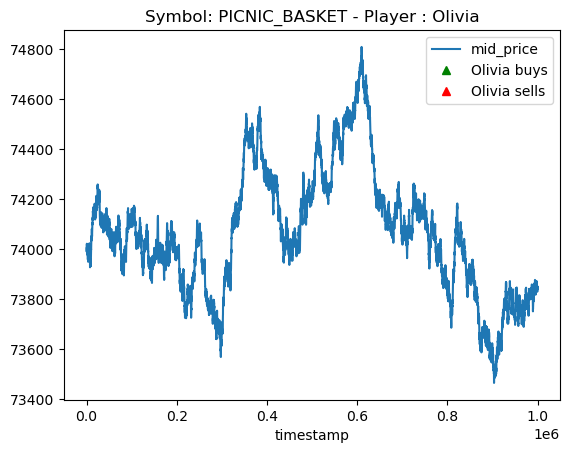

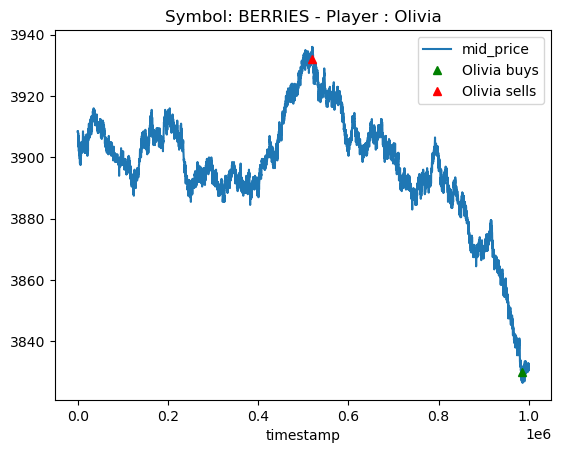

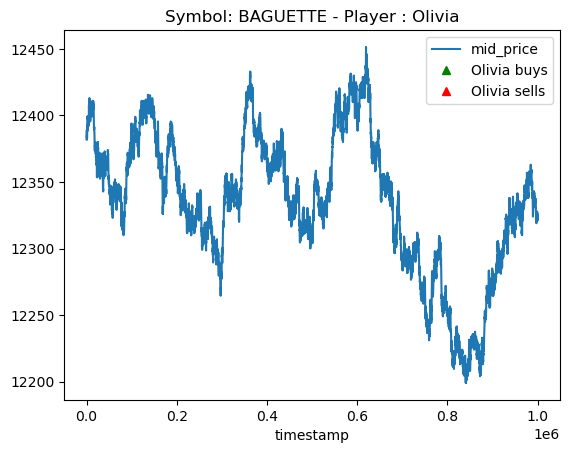

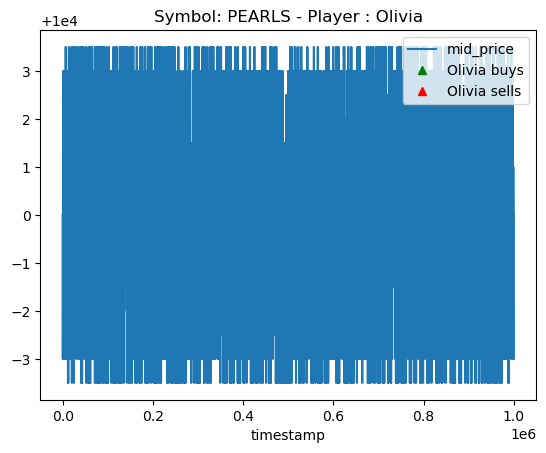

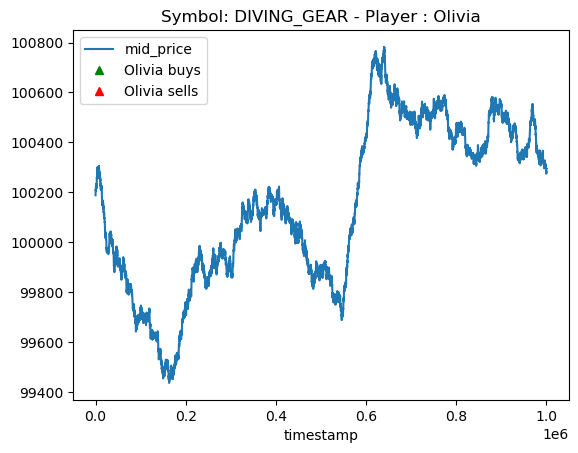

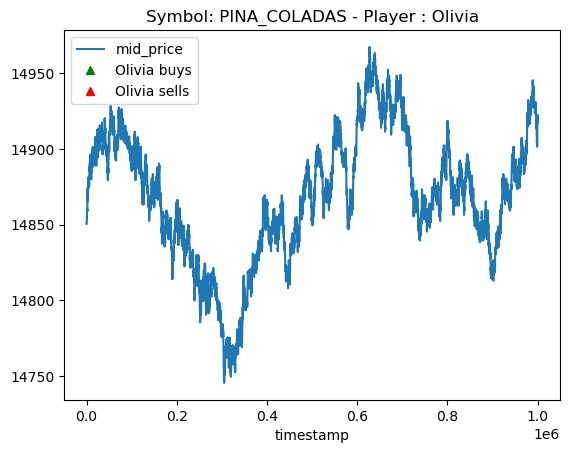

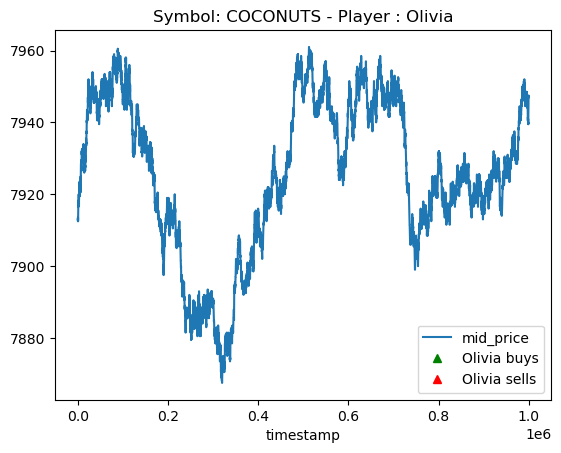

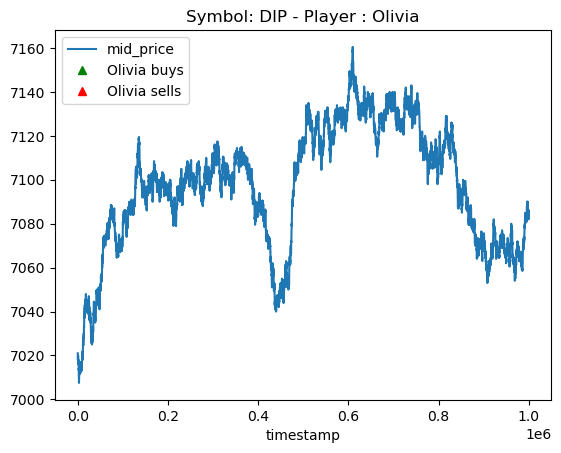

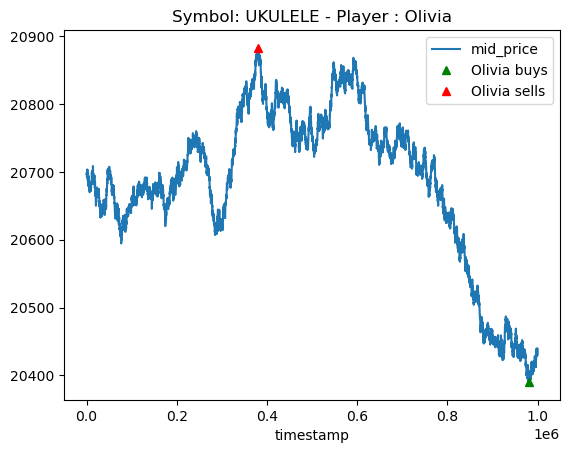

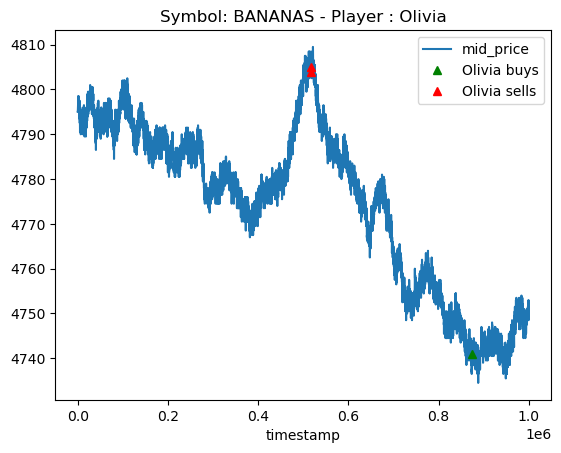

In [178]:
for symbol in prices_dict.keys():
    if symbol == "DOLPHIN_SIGHTINGS":
        continue
    for player in player_buys.keys():
        if player != "Olivia":
            continue
        # plt.figure()
        plt.subplot()
        prices_dict[symbol]\
            .plot()

        player_buys[player].query(f"symbol == '{symbol}'")\
            .price\
            .plot(
                marker ='^', 
                color ='green', 
                linestyle= 'None',
                label = f'{player} buys'
            )
        
        player_sells[player].query(f"symbol == '{symbol}'")\
            .price\
            .plot(
                marker = '^',
                color = 'red',
                linestyle = 'None',
                label = f'{player} sells'
            )
        
        plt.title(f"Symbol: {symbol} - Player : {player}")
        plt.legend()
        plt.show()
    # if n%3 ==0:
    #     plt.show()

In [192]:
pnl : Dict[Tuple[str], pd.Series] = dict()
# for player in player_buys.keys():
#     pnl[player] = 0

for symbol in prices_dict.keys():
    if symbol == "DOLPHIN_SIGHTINGS":
        continue
    for player in player_buys.keys():
            continue
    
        buys = player_buys[player].query(f"symbol == '{symbol}'")\
            .price 
        sells = player_sells[player].query(f"symbol == '{symbol}'")\
            .price
        
        long_pos = player_buys[player].query(f"symbol == '{symbol}'")\
            .quantity
        short_pos = player_sells[player].query(f"symbol == '{symbol}'")\
            .quantity
        
        cash = pd.concat([sells * short_pos, -buys * long_pos])\
            .sort_index()\
            .cumsum()
        
        cash = cash[~cash.index.duplicated(keep='last')]\
            .reindex(prices_dict["BANANAS"].index)\
            .fillna(method = 'ffill')\
            .fillna(0)
        
        position = pd.concat([long_pos, -short_pos])\
            .sort_index()\
            .cumsum()
            
        position = position[~position.index.duplicated(keep='last')]\
            .reindex(prices_dict["BANANAS"].index)\
            .fillna(method= 'ffill')\
            .fillna(0)
        
        value_on_position = position * prices_dict[symbol]

        pnl[player, symbol] = cash + value_on_position

In [202]:
pd.DataFrame(pnl)

,PICNIC_BASKET,BERRIES,BAGUETTE,PEARLS,DIVING_GEAR,PINA_COLADAS,COCONUTS,DIP,UKULELE,BANANAS
timestamp,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
999500,0.0,1734.0,0.0,0.0,0.0,0.0,0.0,0.0,1479.0,1073.0
999600,0.0,1734.0,0.0,0.0,0.0,0.0,0.0,0.0,1479.0,1073.0
999700,0.0,1734.0,0.0,0.0,0.0,0.0,0.0,0.0,1479.0,1073.0


In [181]:
player_buys['Olivia']

,price,symbol,quantity
timestamp,,,
873500,4741.0,BANANAS,17
980600,20390.0,UKULELE,3
985400,3830.0,BERRIES,17


In [182]:
player_sells['Olivia']

,price,symbol,quantity
timestamp,,,
380200,20883.0,UKULELE,3
517400,4805.0,BANANAS,2
517400,4804.0,BANANAS,15
519600,3932.0,BERRIES,17


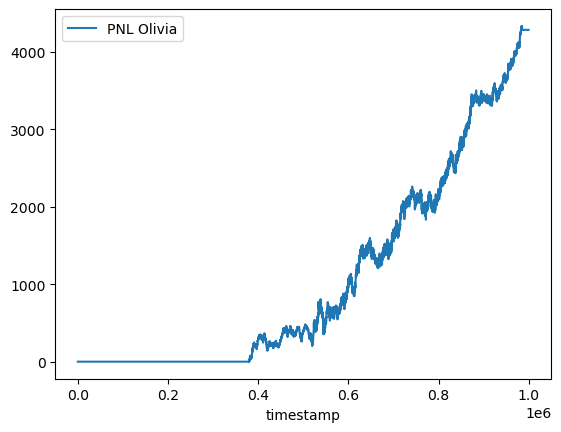

In [183]:
pnl["Olivia"].plot(
    label = "PNL Olivia"
)
plt.legend()

In [184]:
cash[cash.index.duplicated(keep='last')]

Series([], dtype: float64)

In [185]:
cash.drop_duplicates()

timestamp
0             0.0
517400    81670.0
873500     1073.0
dtype: float64